Привет, меня зовут Гребенюк Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>Success:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Hello World!
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Спасибо за работу :)
- У меня есть пара ремарок, которые помогут тебе сделать проект еще лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**СОДЕРЖАНИЕ:**

[**Шаг 1. Откройте файл с данными и изучите общую информацию.**](#step1)

[**Шаг 2. Предобработка данных**](#step2)

[**Шаг 3. Посчитайте и добавьте в таблицу**](#step3)

[**Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:**](#step4)

[**Шаг 5. Общий вывод**](step5)

<div class="alert alert-block alert-success">
<b>Success:</b> 
    
Отлично, что у проекта есть введение и оглавление. Однако стоит задуматься, как еще его можно дополнить, чтобы сделать более ценным для читателя.
    
Советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="step1" />

Откроем файл, применяя аргумент sep, для корректного вывода информации.

In [1]:
import pandas as pd

import matplotlib

import matplotlib.pyplot as plt 

import plotly as py
import plotly.express as px


import seaborn as sns
sns.set()

import datetime as dt

import datetime as dt



In [2]:
def show_hist_by_ploty(data, col_name: str, bins=20, title='Мой график', label_x='X', label_y='Y', histfunc='count', x_range=[]):
    """Функция для построения гистограммы библиотекой ploty
    """
    hist = px.histogram(data,
                        x=col_name,
                        nbins=bins,
                        histfunc=histfunc,
                        title=title,
                        range_x = x_range,
                        labels={col_name: label_x}
            )
    hist.update_yaxes(title_text=label_y)
    hist.show()

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
- советую группировать все импорты и ключевые константы в начале проекта
- стоит отделять импорты от открытия датасета. Это делается для того, чтобы иметь возмонжность в любой момент дописать нвоые библиотеки, перезапустить ячейку с импортами и продолжить работу, не перетирая датасет.
- в данном случае `display()` смотрится лучше, чем `print`
- также я заметил, что нумерация ячеек у тебя идет не с `1`. Советую всегда при загрузке проекта прогонять его на сервере `Kernel -> Restart & run all` это поможет отловить случайные ошибки
    
    ✔ 

Перед нами таблица -архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
Таблица насчитывает 22 столбца, в которых содержатся следующие данные:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Применим метод info для получения информации о таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что 14 столбцов из 22 имеют пропущенные значения.Предстоит работа по обработке пропусков. Нужно разобраться, какие столбцы мы оставим с пропущенными значениями, а в каких необходимо будет избавиться от пропусков.
- В некоторых столбцах есть явное несоответствие типа данных и содержания данных:
- В столбце first_day_exposition указан тип данных, не являющийся типом дата.
- В столбце floors_total не может быть дробного числа, т.к. количество этажей - целочисленное значение.
- В столбце is_apartment тип данных должен быть изменен на булев тип.
- В столбце balcony должно быть целочисленное значение, т.к. не может быть дробного количества балконов.
Число парков и прудов, тоже логично будет привести к типу данных int64.

Для полноты картины вызовем еще один метод, дающий сводку основной информации о таблице.

In [5]:
data.describe().T

count          mean           std      min         25%  \
total_images         23699.0  9.858475e+00  5.682529e+00      0.0        6.00   
last_price           23699.0  6.541549e+06  1.088701e+07  12190.0  3400000.00   
total_area           23699.0  6.034865e+01  3.565408e+01     12.0       40.00   
rooms                23699.0  2.070636e+00  1.078405e+00      0.0        1.00   
ceiling_height       14504.0  2.771499e+00  1.261056e+00      1.0        2.52   
floors_total         23613.0  1.067382e+01  6.597173e+00      1.0        5.00   
living_area          21796.0  3.445785e+01  2.203045e+01      2.0       18.60   
floor                23699.0  5.892358e+00  4.885249e+00      1.0        2.00   
kitchen_area         21421.0  1.056981e+01  5.905438e+00      1.3        7.00   
balcony              12180.0  1.150082e+00  1.071300e+00      0.0        0.00   
airports_nearest     18157.0  2.879367e+04  1.263088e+04      0.0    18585.00   
cityCenters_nearest  18180.0  1.419128e+04  8.608386e+03    181.0     9238.00   
parks_around3000     18181.0  6.114075e-01  8.020736e-01      0.0        0.00   
parks_nearest         8079.0  4.908046e+02  3.423180e+02      1.0      288.00   
ponds_around3000     18181.0  7.702547e-01  9.383456e-01      0.0        0.00   
ponds_nearest         9110.0  5.179809e+02  2.777206e+02     13.0      294.00   
days_exposition      20518.0  1.808886e+02  2.197280e+02      1.0       45.00   

                            50%        75%          max  
total_images               9.00       14.0         50.0  
last_price           4650000.00  6800000.0  763000000.0  
total_area                52.00       69.9        900.0  
rooms                      2.00        3.0         19.0  
ceiling_height             2.65        2.8        100.0  
floors_total               9.00       16.0         60.0  
living_area               30.00       42.3        409.7  
floor                      4.00        8.0         33.0  
kitchen_area               9.10       12.0        112.0  
balcony                    1.00        2.0          5.0  
airports_nearest       26726.00    37273.0      84869.0  
cityCenters_nearest    13098.50    16293.0      65968.0  
parks_around3000           0.00        1.0          3.0  
parks_nearest            455.00      612.0       3190.0  
ponds_around3000           1.00        1.0          3.0  
ponds_nearest            502.00      729.0       1344.0  
days_exposition           95.00      232.0       1580.0

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
    
- В данном случае аутпут будет выглядеть гораздо лучше, если его развернуть `df.describe().T` 
    
    ✔ 
    

Сразу бросаются в глаза следующие артефакты: 
- Общая площадь квартиры - минимальное значение 12 кв.м и максимальное- 900 кв.м.
- В столбце rooms не может быть нулевых значений, т.к. квартир без комнат не существует.
- В столбце ceiling_height так же привлекают внимание минимальное и максимальное число, высота потолка в 1 м и в 100 м кажутся одинаково неправдоподобными числами.
- В столбце living_area минимальное значение жилой площади - 2кв м - маловероятное значение.
- В столбце kitchen_area -минимальное значение площади кухни- 1,3 кв м. Похоже на выброс.
- В столбце airports_nearest минимальное значение 0 м, что означает по логике, что квартира находится в аэропорту, и максимальное значение 84869 м= 869 км. Пулково должно быть гораздо ближе.
- Максимальное значение в столбце cityCenters_nearest тоже выглядит неправдоподобно, 659 км до центра -значение выходит за пределы Ленинградской области.
- С отдаленностью парков - аналогичная ситуация, как и с аэропортом. 


### Вывод

При первом взгляде на таблицу выявлен большой объем пропущенных значений и достаточное количество несоответствий по типам данных. 
При более детальном рассмотрении выявлено множество артефактов.


### Шаг 2. Предобработка данных<a name="step2" />

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [6]:
print(data.isnull().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
Сможешь модифицировать эту запись так, чтобы в неё попадали только те столбцы, где пропусков >0? И по-хорошему, еще добавить столбец с % пропусков

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
И так, и эдак попробовала, не смогла. Можно какую-то более очевидную подсказочку, пожалуйста?)
</div>

Самое большое количество пропусков в столбце is_apartment. Так как тип жилья:Апартаменты - достаточно редкий, то будет уместным заменить все пропуски на значение False. 

Проверим уникальные значения в столбце is_apartment

In [7]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Заменим пропуски на значение: False

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Убедимся, что не осталось пропусков в столбце

In [9]:
data['is_apartment'].unique()

array([False,  True])

Убедимся, что тип данных в столбце is_apartment поменялся на bool 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Также в столбце balcony около половины значений пропущены. Могу предположить, что в этих квартирах просто отсутствуют балконы. Поэтому считаю возможным заменить nan на нули.

Проверим уникальные значения в столбце balcony, 

In [11]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Заменим пропуски на нулевые значения

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Убедимся, что не осталось пропусков в столбце

In [13]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Проверим, как поменялся тип данных в столбце balcony

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип данных остался float64, но так как по логике количество балконов в численном выражении не может иметь знаков после запятой, заменим тип данных на целочисленный.

In [15]:
data['balcony'] = data['balcony'].astype('int64')

Убедимся, что тип данных поменялся на int64.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Оставшиеся колонки с пропущенными значениями оставим без изменения, так как заменить их на нули, или среднее/медиану, даже при группировке по какому-либо признаку - не объективно.

После удаления пропусков, остались колонки с неверным типом данных: first_day_exposition, floors_total, days_exposition

В колонке first_day_exposition хранятся даты публикаций и сейчас эти значения являются строками. Нам же необходимо перевести эти значения в формат даты:

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Выведем первые сроки столбца на экран и проверим, что тип данных изменился на верный.

In [18]:
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Так как в столбце days_exposition содержатся пропуски, поменять тип данных float64 на int64 не получится. 
В столбце находятся данные о количестве дней размещения объявление (от публикации до снятия). Предположим, что пропуски образовались в тех объявлениях, которые еще не сняты по настоящее время. Найтдем максимальную дату закрытия объявления,и будем считать ее датой выгрузки данных. По ней определим количество дней размещения объявления.

Определим количество пропусков до обработки колонки

In [19]:
print('Пропуски до {}'.format(data['days_exposition'].isna().sum()))

Пропуски до 3181


Найдем максимальное значение в столбце 'first_day_exposition' и примем это значение за дату выгрузки данных

In [20]:
max_dt= data['first_day_exposition'].max()

Заполняем пропуски в столбце days_exposition на разницу максимальной датой и датой публикации. Получившуюся дельту нам следует перевести в числовое значение с помощью свойства dt.days

In [21]:
data.loc[data['days_exposition'].isna(),'days_exposition'] = (max_dt - data.loc[data['days_exposition'].isna(), 'first_day_exposition']).dt.days

Сделаем проверку. не осталось ли в столбце пропусков.

In [22]:
print('Пропуски после {}'.format(data['days_exposition'].isna().sum()))

Пропуски после 0


Переведем данные столбца days_exposition к целочисленному формату.

In [23]:
data['days_exposition'] = data['days_exposition'].astype('int16')

Отформатируем колонки, в которых нет пропусков, до соттветсвующего данным формата, в целях экономии памяти.

In [24]:
data['total_images'] = data['total_images'].astype('int8')

In [25]:
data['rooms'] = data['rooms'].astype('int8')

In [26]:
data['total_area'] = data['total_area'].astype('int16')

In [27]:
data['floor'] = data['rooms'].astype('int8')

In [28]:
data['last_price'] = data['last_price'].astype('int32')

In [29]:
data['balcony'] = data['balcony'].astype('int8')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int16         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [31]:
for dtype in ['float','int','object', 'datetime64[ns]', 'bool']:
    selected_dtype = data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.16 MB
Average memory usage for int columns: 0.05 MB
Average memory usage for object columns: 1.25 MB
Average memory usage for datetime64[ns] columns: 0.09 MB
Average memory usage for bool columns: 0.02 MB


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Потенциал для эффективного изменения типов тут гораздо шире.
    
Давай я дам тебе две классные статьи, а ты попробуешь изменить типы данных на еще более подходящие и замеришь, сколько памяти в % ты сэкономишь:
    
https://pyprog.pro/data_types.html
    
https://habr.com/ru/company/ruvds/blog/442516/
    
    ✔

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Поправила значения нескольких столбцов на int8, int16 и int32. Не знаю, уместно ли то же самое проворачивать со столбцами, где пропуски, уменьшая например float64 на float16?
</div>

Остался всего один столбец, в котором надо было бы изменить тип данных. Это floors_total. Но в связи с тем, что в нем содержатся пропуски, а заменить их на какое-либо значение нет оснований, то оставим данные этого столбца без изменений и перейдем к следующему шагу. 

### Шаг 3. Посчитайте и добавьте в таблицу  <a name="step3" />

Посчитаем и добавим в таблицу столбец с ценой за  квадратный метр. Разделим цену на момент снятия с публикации на общую площадь жилья.

In [32]:
data['price_for_sqm'] =data['last_price'] / data['total_area']  

Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления. Для этого поочередно применим метод pd.to_datetime и свойства .dt.weekday,.dt.month, .dt.year к столбцу first_day_exposition.

In [33]:
data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday

In [34]:
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month

In [35]:
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year

Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой. Напишем функцию, которая будет выполнять категоризацию данных столбца 'floor'

In [36]:
def category_floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
   
    return 'другой'


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Можно в этой функции последнее условие обобщить и записать `else`. Или вообще от него избавиться и сразу выйти в return
    
https://medium.com/lemon-code/guard-clauses-3bc0cd96a2d3
    ✔ 

Создадим новый столбец, данные которого будут содержать наименования категорий 'другой', 'первый', 'последний', 'нет данных'

In [37]:
data['flat_floor'] = data.apply(category_floors, axis=1)

Проверим значения столбца 'flat_floor'

In [38]:
data['flat_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Посчитаем и добавим в таблицу: соотношение жилой и общей площади

In [39]:
data['ratio_living_to_total_area'] = data['living_area'] / data['total_area'] 

Посчитаем и добавим в таблицу: отношение площади кухни к общей

In [40]:
data['ratio_kitchen_to_total_area'] = data['kitchen_area'] / data['total_area'] 

Выведем шапку таблицы на экран и проверим наличие всех новых столбцов.

In [41]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      3         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      2         False  ...   
3             NaN          14.0          NaN      3         False  ...   
4            3.03          14.0         32.0      2         False  ...   

   ponds_around3000  ponds_nearest  days_exposition  price_for_sqm weekday  \
0               2.0          755.0               57  120370.370370       3   
1               0.0            NaN               81   83750.000000       1   
2               2.0          574.0              558   92785.714286       3   
3               3.0          234.0              424  408176.100629       4   
4               1.0           48.0              121  100000.000000       1   

   month  year  flat_floor  ratio_living_to_total_area  \
0      3  2019      другой                    0.472222   
1     12  2018      первый                    0.465000   
2      8  2015      другой                    0.612500   
3      7  2015      другой                         NaN   
4      6  2018      другой                    0.320000   

   ratio_kitchen_to_total_area  
0                     0.231481  
1                     0.275000  
2                     0.148214  
3                          NaN  
4                     0.410000  

[5 rows x 29 columns]

Все необходимые данные посчитаны, переходим к следующему шагу.

<div class="alert alert-block alert-success">
<b>Success:</b> Отлично! Все столбцы на месте :)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:<a name="step4" />

Изучим общую площадь квартир

In [42]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь 12 кв м, максимальная - 900 кв м. Достаточно удивительные, но вполне имеющие место быть значения. (Пришлось зайти на Яндекс Недвижимость, чтобы в этом убедиться.)

Построим гистограмму, чтобы увидеть, как часто встречаются те или иные объявления по признаку площади.

In [43]:
show_hist_by_ploty(data, 
                   col_name="total_area", 
                   bins=100, 
                   title='Распределение по общей площади квартир за 2014-2019гг', 
                   label_x="Общая площадь в м2",
                   x_range=[0, 300],
                   label_y='Количество'
                )

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Дальше будут проекты, где тебе придется строить очень много графиков, поэтому лучше сразу их правильно строить. На данном графике у тебя должны быть подписаны оси, ось Y должна содержать еще размерность данных (шт., млн. и т.д.). Оси и заголовок должны быть на одном языке. В заголовке еще можно написать за какой период у нас данные. Поправь и другие графики в проекте.

Правильное оформление графиков сильно повышает вероятность сдачи проекта с первого раза ;)
    
Также скину тебе сайт с подборкой крутых примеров на разных библиотеках:
    
https://python-graph-gallery.com/
    
В идеале, конечно, сразу начинать осваивать какую-нибудь хорошую либу (plotly или seaborn например)

</div>
✔
Сначала хотела использовать seaborn, но не смогла найти , как поменять название оси х. Все что я нагуглила, как будто уже вышло из обращения(


Квартиры от 200 до 300 кв м еле видны на графики, а 900 - видимо одно уникальное значение.

Построим boxplot по столбцу: общая площадь.

(0.0, 900.0)

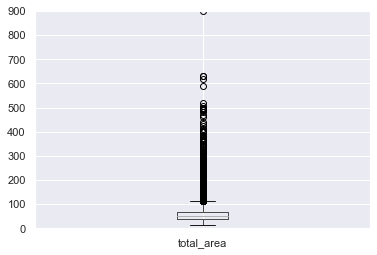

In [44]:
data.boxplot(column='total_area')
plt.ylim(0, 900)

Boxplot отделил "усами" квартиры площадью больше 100 кв м. Для более точного значения посчитаем квантили (0.95 и 0.05) для отсечения выбросов в скором будущем.

In [45]:
data['total_area'].quantile(0.95)

116.0

In [46]:
data['total_area'].quantile(0.05)

31.0

Типичные квартиры в Петербурге и Ленинградской области имеют диапозон по площади от 31 кв м до 116 кв м.

Изучим стоимость квартир

In [47]:
data['last_price'].describe()


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная стоимость 1, 21 млн руб, максимальная- 763 млн. руб. Возможно речь идет о мини-жилье, площадью 12 м и о "дворце", площадью 900 кв м. Но это не имеет большого значения, т.к. скорее всего эти цифры нельзя отнести к типичным.
Построим гистограмму по стоимости квартир.

In [48]:
show_hist_by_ploty(data, 
                   col_name="last_price", 
                   bins=10000, 
                   title='Распределение по общей площади квартир за 2014-2019гг', 
                   label_x="Стоимость руб.",
                   x_range=[0, 15000000],
                   label_y='Количество'
                )

По количеству объявлений чаще всего встречаются квартиры за 4-5 млн. руб.

Построим boxplot по столбцу: стоимость квартиры.

(0.0, 100000000.0)

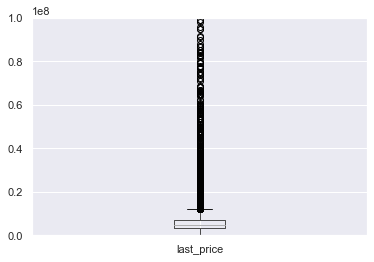

In [49]:
data.boxplot(column='last_price')
plt.ylim(0,100000000)

Верхний "ус" отсекает значения чуть выше 15 млн. рублей. Для более точного "портрета" типичной квартиры посчитаем квантили по верхней и нижней границе (0.95 и 0.05).

In [50]:
data['last_price'].quantile(0.95)

15300000.0

In [51]:
data['last_price'].quantile(0.05)

1870000.0

Итак, готова новая характиристика типичного Питерского жилья. Стоимость в пределах от 1,87 млн руб до 15,3 млн. руб.

Изучим количество комнат.

In [52]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В этом столбце у нас остались пропуски, но я решила от них не избавляться, так как не нахожу объективного значения, которым можно было бы эти пропуски заменить. Поэтому откинем нулевые значения позже, как выброс. Построим гистограмму, чтобы посмотреть, какое количество комнат преобладает в объявлениях.

In [53]:
show_hist_by_ploty(data, 
                   col_name="rooms", 
                   bins=50, 
                   title='Распределение по числу комнат за 2014-2019гг', 
                   label_x="количество комнат, ед",
                   x_range=[0, 19],
                   label_y='Количество'
                )

Построим boxplot по столбцу: количество комнат.

(0.0, 19.0)

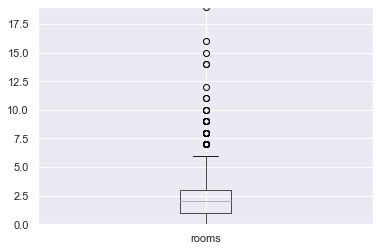

In [54]:
data.boxplot(column='rooms')
plt.ylim(0,19)

In [55]:
data['rooms'].quantile(0.95)

4.0

In [56]:
data['rooms'].quantile(0.05)

1.0

Чуть позже мы откинем все значения, которые не входят в интервал от 1-4 комнат.

Изучим высоту потолков.

In [57]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение 1 м и максимальное 100 м  - точно не имеют отношение к реальности. 

In [58]:
show_hist_by_ploty(data, 
                   col_name="ceiling_height", 
                   bins=1000, 
                   title='Распределение по высоте потолков за 2014-2019гг', 
                   label_x="высота потолков, м",
                   x_range=[0, 4],
                   label_y='Количество'
                )

(0.0, 5.0)

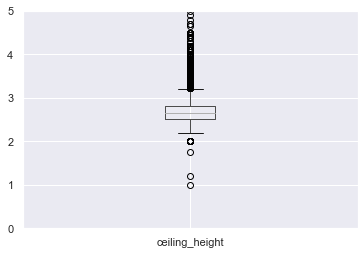

In [59]:
data.boxplot(column='ceiling_height')
plt.ylim(0,5)

In [60]:
data['ceiling_height'].quantile(0.95)

3.3

In [61]:
data['ceiling_height'].quantile(0.05)

2.5

Значения,представляющие типичное жилье в Петербурге и Лен. области, имеют потолок от 2,5 м до 3,3 м.

Изучим количество дней активности объявления.

In [62]:
data['days_exposition'].describe()

count    23699.000000
mean       185.821722
std        233.380877
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

Минимальное количество дней - о, возможно квартира была продана в тот же день. А максимальное количество дней -1618.Почти 4, 5 года. Но чаще всего объявления снимаются примерно за три месяца. Может быть это срок, после которого, нужно обновлять объявление? Среднее значение 185 дней. Соответственно, то, что продается раньше , чем через полгода - можно считать быстрой продажей, то, что свыше полугода- долгой.

In [63]:
show_hist_by_ploty(data, 
                   col_name="days_exposition", 
                   bins=100, 
                   title='Распределение по количеству дней выставления объявления за 2014-2019гг', 
                   label_x="количество дней выставления объявления",
                   x_range=[0, 1500],
                   label_y='Количество'
                )

(0.0, 1600.0)

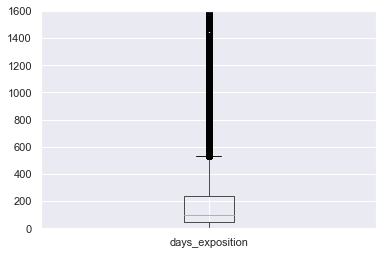

In [64]:
data.boxplot(column='days_exposition')
plt.ylim(0,1600)

Количество дней объявления на сайте практически никак не характеризует типичность жилья, поэтому не будем отсекать выбросы по этому столбцу.

А теперь уберем редкие и выбивающиеся значения. И сохраним срез в sample_data.

In [65]:
sample_data = data.query('31 < total_area < 116 and 200000 < last_price<15000000 and 1<= rooms <=4 and 2.5 < ceiling_height < 3.3')

In [66]:
sample_data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000         108           2019-03-07      3   
4              2    10000000         100           2018-06-19      2   
10             5     5050000          39           2017-11-16      1   
13            20     3550000          42           2017-07-01      2   
16            11     6700000          82           2017-11-23      3   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70          16.0         51.0      3         False  ...   
4             3.03          14.0         32.0      2         False  ...   
10            2.67          12.0         20.3      1         False  ...   
13            2.56           5.0         27.0      2         False  ...   
16            3.05           5.0         55.6      3         False  ...   

    ponds_around3000  ponds_nearest  days_exposition  price_for_sqm weekday  \
0                2.0          755.0               57  120370.370370       3   
4                1.0           48.0              121  100000.000000       1   
10               2.0          553.0              137  129487.179487       3   
13               3.0          298.0              366   84523.809524       5   
16               0.0            NaN              397   81707.317073       3   

    month  year  flat_floor  ratio_living_to_total_area  \
0       3  2019      другой                    0.472222   
4       6  2018      другой                    0.320000   
10     11  2017      первый                    0.520513   
13      7  2017      другой                    0.642857   
16     11  2017      другой                    0.678049   

    ratio_kitchen_to_total_area  
0                      0.231481  
4                      0.410000  
10                     0.217949  
13                     0.123810  
16                     0.109756  

[5 rows x 29 columns]

In [67]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 8823 non-null   int8          
 1   last_price                   8823 non-null   int32         
 2   total_area                   8823 non-null   int16         
 3   first_day_exposition         8823 non-null   datetime64[ns]
 4   rooms                        8823 non-null   int8          
 5   ceiling_height               8823 non-null   float64       
 6   floors_total                 8817 non-null   float64       
 7   living_area                  8389 non-null   float64       
 8   floor                        8823 non-null   int8          
 9   is_apartment                 8823 non-null   bool          
 10  studio                       8823 non-null   bool          
 11  open_plan                    8823 non-null

Мы получили таблицу с данными по типичному жилью в Петербурге и Лен. области.

Проанализируем зависимость цены квартир от размера площади.

<AxesSubplot:xlabel='total_area'>

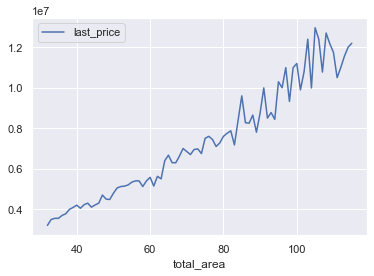

In [68]:
report_total_area = sample_data.groupby('total_area').agg({'last_price':'median'})
report_total_area.plot()

в целом видна прямая зависимость, чем больше площадь, тем выше цена на жилье, что логично. Всплески на графики могут говорить о зависимости цены и от других факторов.

Проанализируем зависимость цены от количества комнат.

<AxesSubplot:xlabel='rooms'>

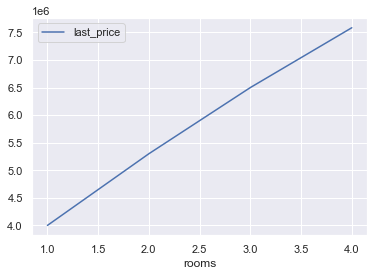

In [69]:
report_room = sample_data.groupby('rooms').agg({'last_price':'median'})
report_room.plot()

На графике видна практически идеальная восходящая прямая зависимость. Соответственно, этот фактор показывает наиболее очевидную зависимость, чем больше комнат- тем выше цена.

Проанализируем зависимость цен на жилье от этажа.

            last_price
flat_floor            
другой       5910878.5
первый       4000000.0
последний    4180000.0


<AxesSubplot:xlabel='flat_floor'>

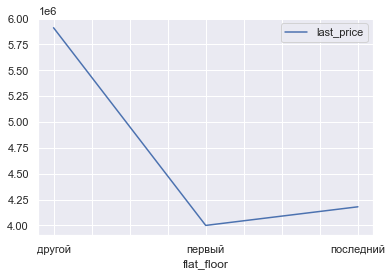

In [70]:
report_floor = sample_data.groupby('flat_floor').agg({'last_price':'median'})
print(report_floor)
report_floor.plot()

<div class="alert alert-block alert-success">
<b>Success:</b> Отлично!

Самую низкую стоимость имеют квартиры на первом этаже,на последнем этаже квартиры дешевле, чем на других этажах в целом.

Проанализируем, как меняется цена в зависимости удаленности от центра.

<AxesSubplot:xlabel='cityCenters_nearest'>

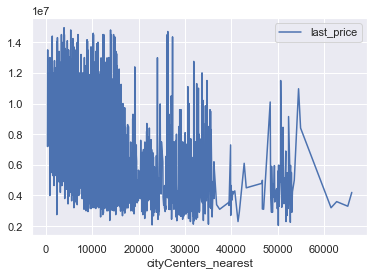

In [71]:
report_cityCenters_nearest = sample_data.groupby('cityCenters_nearest').agg({'last_price':'median'})
report_cityCenters_nearest.plot()

Самое дорогое жилье в центре и объявления о продаже чаще всего встречаются именно от 0 до 15 км. Резкий всплеск с 25 до 27 км. Похоже, на новый район с элитным жильем.С 36 км до 50 сильный спад объявлений и цены на жилье там не высоки. Оживление на 50 км, цены достаточно высоки, объявлений достаточно много.

Проанализируем зависимость цены от дня недели подачи объявления.

<AxesSubplot:xlabel='weekday'>

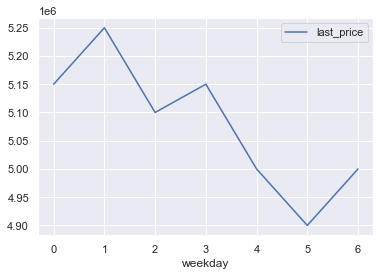

In [72]:
report_weekday = sample_data.groupby('weekday').agg({'last_price':'median'})
report_weekday.plot()


Во вторник объявления с самой высокой ценой. В субботу - с самой низкой. Возможно в определенный момент продавец решает снизить цену по своему объявлению. И этот день суббота.

Проанализируем зависимость цены от месяца размещения объявления.

<AxesSubplot:xlabel='month'>

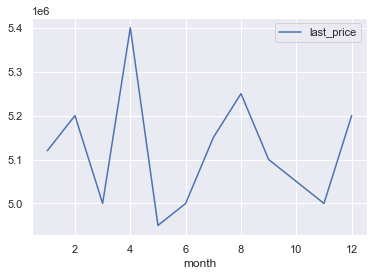

In [73]:
report_month = sample_data.groupby('month').agg({'last_price':'median'})
report_month.plot()

Здесь можно проследить пик в апреле и спад в мае, плавный подъем к августу и резкий спад к сентябрю.Самый стабильный период с сентября по ноябрь.

Проанализируем зависимость цен на квартиры от года размещения объявления.

<AxesSubplot:xlabel='year'>

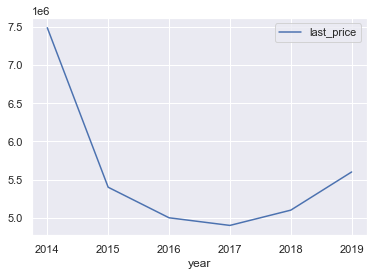

In [74]:
report_year = sample_data.groupby('year').agg({'last_price':'median'})
report_year.plot()

<AxesSubplot:xlabel='year'>

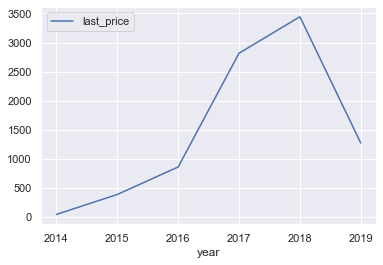

In [75]:
report_year = sample_data.groupby('year').agg({'last_price':'count'})
report_year.plot()

Как, мы помним, в 2014 случилось резкое ослабление рубля, кризис, курс доллара подскочил в 2 раза, платежеспособность населения резко упала , как следствие цены на жилье пошли на спад, количество объявлений при этом было очень низким, что объяснимо тем же кризисом.Самый высокий рост количества объявлений происходит с 16-17 год, плавный рост идет до 2018го. В 2018 цены вновь начинают расти. 2018 ознаменован проведением чемпионата мира по футболу, что положительно повлияло на экономику страны.
Однако в После 2018го цены опять поднимаются, количество - опять снижается. 
В динамике по годам прослеживается такая зависимость - чем больше количесво объявлений - тем ниже цены, тем меньше количество объявлений - тем выше цены. Это логично, имя этому явлению - конкуренция.

<div class="alert alert-block alert-warning">
<b>Remarks:</b> При любой категоризации (например по годам) важно смотреть на то, какой объем данных попал в каждую категорию
   
✔ 

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Надеюсь, я правильно тебя поняла, Артем
</div>

Нам необходимо определить топ-10 населенных пунктов по количеству объявлений.

Данные о названии нас. пункта лежат в столбце locality_name. Посмотрим на уникальные значения в этом столбце.

In [76]:
sample_data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'посёлок Мурино', 'Сертолово',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Кингисепп', 'Сестрорецк', 'деревня Куттузи', 'поселок Торковичи',
       'поселок Первомайское', 'посёлок Понтонный', 'Ломоносов',
       'деревня Старая', 'деревня Лесколово', 'Красное Село',
       'село Путилово', 'Волхов', 'Никольское', 'посёлок Шушары',
       'деревня Кальтино', 'Кудрово', 'Зеленогорск', 'Луга', 'Колпино',
       'Ивангород', 'посёлок городского типа Красный Бор',
       'поселок Бугры', 'посёлок Металлострой', 'посёлок Победа',
       'поселок городского типа Синявино', 'Тосно', 'Волосово',
       'поселок Романовка', 'деревня Лопухинка',
       'поселок городского типа Советский', 'Гатчина',
       'посёлок Петровское', 'посёлок городского типа Ток

Построим таблицу, сгруппированную по признаку "Населенный пункт", отсортированную по количеству объявлений и выведем первых 10 строк

In [77]:
report_locality = sample_data.pivot_table(index='locality_name', values='total_images', aggfunc='count').sort_values('total_images', ascending=False).head(10)
print(report_locality)

                   total_images
locality_name                  
Санкт-Петербург            6212
Всеволожск                  226
посёлок Шушары              170
посёлок Мурино              166
посёлок Парголово           122
Пушкин                      121
деревня Кудрово             108
Колпино                      89
Сестрорецк                   87
Петергоф                     82


Результат ожидаемый. С огромным отрывом по количеству объявлений идет Санкт-Петербург.

In [78]:
top10_locality = report_locality.index.tolist()

In [79]:
top10_locality 

['Санкт-Петербург',
 'Всеволожск',
 'посёлок Шушары',
 'посёлок Мурино',
 'посёлок Парголово',
 'Пушкин',
 'деревня Кудрово',
 'Колпино',
 'Сестрорецк',
 'Петергоф']

Сгруппируем данные по населенным пунктам, добавим необходимые столбцы для аналица : средняя цена за кв м, стоимость квартиры максимальная и минимальная.

In [80]:
report_local = sample_data.groupby('locality_name').agg({'first_day_exposition':'count','price_for_sqm':'mean','last_price':['max','min'] })

Отсортируем полученные значения по количеству поданных объявлений.

In [81]:
report_local.sort_values(by=('first_day_exposition', 'count'), ascending=False).head(10)

first_day_exposition  price_for_sqm last_price         
                                 count           mean        max      min
locality_name                                                            
Санкт-Петербург                   6212  110400.802467   14990000  1600000
Всеволожск                         226   68173.860660   10300000  1350000
посёлок Шушары                     170   78638.250351    8179000  2440000
посёлок Мурино                     166   86548.558701    7500000  2470000
посёлок Парголово                  122   91340.965230    9140000  2500000
Пушкин                             121  103991.691645   14700000  2990000
деревня Кудрово                    108   90218.080221    9950000  2750000
Колпино                             89   76435.912214   12750000  2370000
Сестрорецк                          87  102935.045489   13999000  3300000
Петергоф                            82   84796.492992   12000000  2200000

<div class="alert alert-block alert-success">
<b>Success:</b> Превосходная работа!

- Самое дорогое жилье в Санкт-Петербурге, но и бюджетное жилье в городе тоже можно приобрести.
- Во Всеволожске самые низкие цены на жилье и объявлений в этом населенном пункте достаточно много (на втором месте по количеству объявлений был именно Всеволожск). Кажется, что людям не особо нравится жить в этом городе.
- Очень дорого стоят квартире в Пушкине и Сестрорецке. Сестрорецк считается морским курортом, Пушкин же просто очень красивый город с хорошей инфрасруктурой и хорошим сообщением до Санкт-Петербурга. Поэтому высокие цены на жилье в этих населенных пунктах оправданы. 

Определим, что можно считать центром Санкт-Петербурга.

In [82]:
spb_center = sample_data.query('locality_name== "Санкт-Петербург"')
spb_center.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000         108           2019-03-07      3   
4              2    10000000         100           2018-06-19      2   
10             5     5050000          39           2017-11-16      1   
16            11     6700000          82           2017-11-23      3   
23            11     2950000          32           2016-10-29      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70          16.0         51.0      3         False  ...   
4             3.03          14.0         32.0      2         False  ...   
10            2.67          12.0         20.3      1         False  ...   
16            3.05           5.0         55.6      3         False  ...   
23            2.60           9.0         17.7      1         False  ...   

    ponds_around3000  ponds_nearest  days_exposition  price_for_sqm weekday  \
0                2.0          755.0               57  120370.370370       3   
4                1.0           48.0              121  100000.000000       1   
10               2.0          553.0              137  129487.179487       3   
16               0.0            NaN              397   81707.317073       3   
23               1.0          190.0              615   92187.500000       5   

    month  year  flat_floor  ratio_living_to_total_area  \
0       3  2019      другой                    0.472222   
4       6  2018      другой                    0.320000   
10     11  2017      первый                    0.520513   
16     11  2017      другой                    0.678049   
23     10  2016      первый                    0.553125   

    ratio_kitchen_to_total_area  
0                      0.231481  
4                      0.410000  
10                     0.217949  
16                     0.109756  
23                     0.190625  

[5 rows x 29 columns]

Создадим в новом срезе столбец с расстоянием до центра в км.

In [83]:
spb_center['cityCenter_km']=spb_center['cityCenters_nearest']/1000
spb_center['cityCenter_km']=round(spb_center['cityCenter_km'])
spb_center.head()
 


<ipython-input-83-f3233009e7e6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-f3233009e7e6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000         108           2019-03-07      3   
4              2    10000000         100           2018-06-19      2   
10             5     5050000          39           2017-11-16      1   
16            11     6700000          82           2017-11-23      3   
23            11     2950000          32           2016-10-29      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70          16.0         51.0      3         False  ...   
4             3.03          14.0         32.0      2         False  ...   
10            2.67          12.0         20.3      1         False  ...   
16            3.05           5.0         55.6      3         False  ...   
23            2.60           9.0         17.7      1         False  ...   

    ponds_nearest  days_exposition  price_for_sqm  weekday month  year  \
0           755.0               57  120370.370370        3     3  2019   
4            48.0              121  100000.000000        1     6  2018   
10          553.0              137  129487.179487        3    11  2017   
16            NaN              397   81707.317073        3    11  2017   
23          190.0              615   92187.500000        5    10  2016   

    flat_floor  ratio_living_to_total_area  ratio_kitchen_to_total_area  \
0       другой                    0.472222                     0.231481   
4       другой                    0.320000                     0.410000   
10      первый                    0.520513                     0.217949   
16      другой                    0.678049                     0.109756   
23      первый                    0.553125                     0.190625   

    cityCenter_km  
0            16.0  
4             8.0  
10           14.0  
16           11.0  
23           14.0  

[5 rows x 30 columns]

Построим график зависимости цены от расстояния до центра в км.

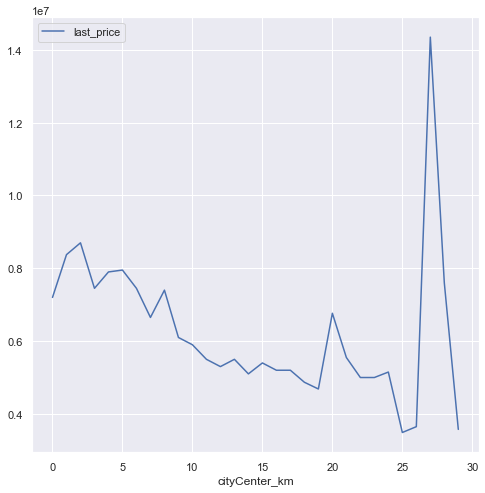

In [84]:
((spb_center
     .pivot_table(index='cityCenter_km', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(8, 8))
) )
plt.show()

 На графике видим первый сильный спад цен на отметке 3 км. и затем еще один на отметке 10 км. Определим, что эта окружность с точкой центра = окм, и радиусом = 10 км и будет центр. Сделаем срез по квартирам в центре Санкт-Петрбурга.

<div class="alert alert-block alert-success">
<b>Success:</b> соглашусь, но я бы выбрал второй пик - 9-10км

In [85]:
flats_in_center = spb_center.query('0 < cityCenter_km <10')
flats_in_center.head()

total_images  last_price  total_area first_day_exposition  rooms  \
4               2    10000000         100           2018-06-19      2   
85             13     5200000          46           2018-11-26      2   
137            11    13310800          85           2018-01-01      2   
145             6     8290000          77           2015-09-21      2   
159            14     7050000          66           2017-09-04      3   

     ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
4              3.03          14.0        32.00      2         False  ...   
85             3.00           5.0        27.80      2         False  ...   
137            2.70          10.0        31.52      2         False  ...   
145            2.77          16.0        40.00      2         False  ...   
159            3.00           4.0        37.80      3         False  ...   

     ponds_nearest  days_exposition  price_for_sqm  weekday month  year  \
4             48.0              121  100000.000000        1     6  2018   
85           682.0               65  113043.478261        0    11  2018   
137          133.0              340  156597.647059        0     1  2018   
145          260.0              807  107662.337662        0     9  2015   
159         1013.0               98  106818.181818        0     9  2017   

     flat_floor  ratio_living_to_total_area  ratio_kitchen_to_total_area  \
4        другой                    0.320000                     0.410000   
85       другой                    0.604348                     0.173913   
137      другой                    0.370824                     0.315882   
145      другой                    0.519481                     0.129870   
159      другой                    0.572727                     0.166667   

     cityCenter_km  
4              8.0  
85             9.0  
137            4.0  
145            7.0  
159            5.0  

[5 rows x 30 columns]

Построим график зависимости цены от удаленности от центра.

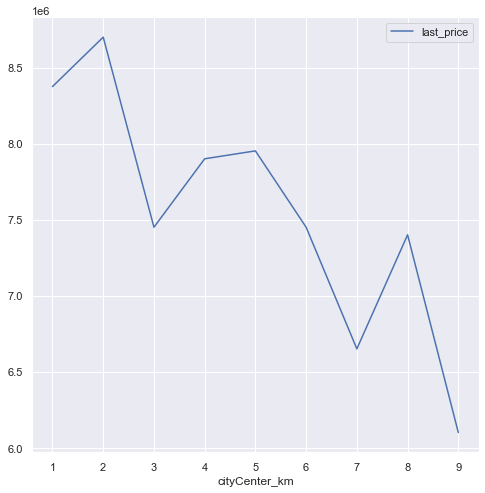

In [86]:
((flats_in_center
     .pivot_table(index='cityCenter_km', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(8, 8))
) )
plt.show()

Получилась укрупненная версия предыдущего графика по этой зависимости. 

Изучим общую площадь квартир в центре Петербурга.

In [87]:
flats_in_center['total_area'].describe()

count    1606.000000
mean       66.528643
std        20.047703
min        32.000000
25%        50.000000
50%        65.000000
75%        80.000000
max       115.000000
Name: total_area, dtype: float64

Средняя площадь квартиры в центре = 65 кв м.

Построим гистограмму, чтобы посмотреть, квартиры с какой площадью  преобладают в объявлениях.

In [88]:
show_hist_by_ploty(flats_in_center, 
                   col_name="total_area", 
                   bins=50, 
                   title='Распределение по общей площади квартир в центре Санкт-Петербурга за 2014-2019гг', 
                   label_x="Общая площадь, м2",
                   x_range=[0, 200],
                   label_y='Количество'
                )

Наверняка есть стандартный метраж квартир в определенных типах домов в центре, и наиболее часто встречаются квартиры с общим метражом в 65 кв м.

Изучим стоимость квартир в центре Петербурга.

In [89]:
flats_in_center['last_price'].describe()

count    1.606000e+03
mean     7.890488e+06
std      2.651246e+06
min      1.600000e+06
25%      5.900000e+06
50%      7.485000e+06
75%      9.500000e+06
max      1.499000e+07
Name: last_price, dtype: float64

Мы наблюдаем большой разброс цен от очень дешевого жилья (1, 6 млн руб) до самого дорогого (14,99 млн.руб)

Построим гистограмму, чтобы посмотреть, квартиры с стоимостью преобладают в объявлениях.

In [90]:
show_hist_by_ploty(flats_in_center, 
                   col_name="last_price", 
                   bins=100, 
                   title='Распределение по стоимости квартир в центре Санкт-Петербурга за 2014-2019гг ', 
                   label_x="Стоимость,руб",
                   x_range=[1600000, 15000000],
                   label_y='Количество'
                )

Но слишком низкая, как и слишком высокая цена встречается редко. Основной массив объявлений приходится на квартиры стоимостью от 7 до 9 млн. руб.

Изучим количество комнат квартир в центре Петербурга.

In [91]:
flats_in_center['rooms'].describe()

count    1606.000000
mean        2.320050
std         0.878789
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64

Построим гистограмму, чтобы посмотреть, квартиры с каким количеством комнат преобладают в объявлениях.

In [92]:
show_hist_by_ploty(flats_in_center, 
                   col_name="rooms", 
                   bins=50, 
                   title='Распределение по количеству комнат квартир в центре Санкт-Петербурга за 2014-2019гг ', 
                   label_x="количество комнат, ед",
                   x_range=[0, 5],
                   label_y='Количество'
                )

В объявлениях о продаже преобладают двухкомнатные и трехкомнатные квартиры.

Изучим высоту потолков квартир в центре Петербурга.

In [93]:
flats_in_center['ceiling_height'].describe()

count    1606.000000
mean        2.910025
std         0.193244
min         2.510000
25%         2.750000
50%         2.950000
75%         3.030000
max         3.280000
Name: ceiling_height, dtype: float64

Средняя высота потолков в квартирах в центре 3 м.

Построим гистограмму, чтобы посмотреть, квартиры с какой высотой потолков преобладают в объявлениях.

In [94]:
show_hist_by_ploty(flats_in_center, 
                   col_name="ceiling_height", 
                   bins=30, 
                   title='Распределение по высоте потолков квартир в центре Санкт-Петербурга за 2014-2019гг ', 
                   label_x="высота потолков, м ",
                   x_range=[2, 4],
                   label_y='Количество'
                )

Очень небольшое количество квартир с потолками ниже 3 м. В основном в квартирах есть "простор".

Сравним зависимость цены от количества комнат в квартирах в центре и в целом по городу:

<AxesSubplot:xlabel='rooms'>

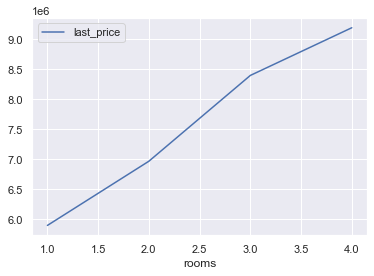

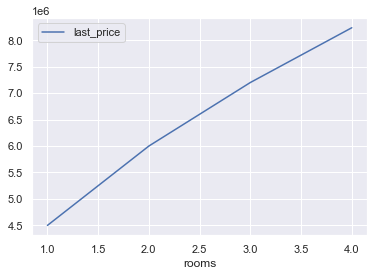

In [95]:
report_room_spb_center = flats_in_center.groupby('rooms').agg({'last_price':'median'})
report_room_spb_center.plot()
report_room_spb = spb_center.groupby('rooms').agg({'last_price':'median'})
report_room_spb.plot()

Количество комнат - является определенно самым объективным признаком повышения цены. Конечно, при условии, если мы сравнимаем квартире в одном и том же населенном пункте.

Сравним зависимость цены от этажа в квартирах в центре и в целом по городу:

            last_price
flat_floor            
другой         7952056
первый         5900000
последний      8200000
            last_price
flat_floor            
другой         6640000
первый         4500000
последний      7800000


<AxesSubplot:xlabel='flat_floor'>

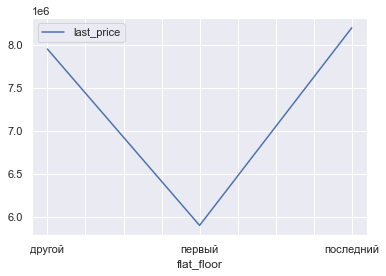

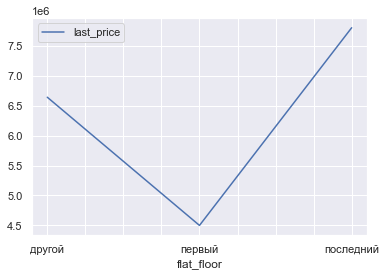

In [96]:
report_floor_spb_center = flats_in_center.groupby('flat_floor').agg({'last_price':'median'})
print(report_floor_spb_center)
report_floor_spb_center.plot()
report_floor_spb = spb_center.groupby('flat_floor').agg({'last_price':'median'})
print(report_floor_spb)
report_floor_spb.plot()

А здесь наблюдаем явное отличие. Цена квартир на последнем этаже в целом по городу выше, чем на других этажах. А в центре- примерно на одинаковом уровне. Видимо Петербург славится своими мансардами не только в историческом центре.

Сравним зависимость цены от удаленности от центра в квартирах в центре и в целом по городу:

<AxesSubplot:xlabel='cityCenters_nearest'>

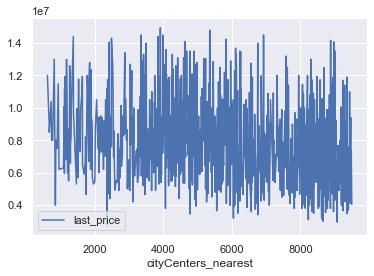

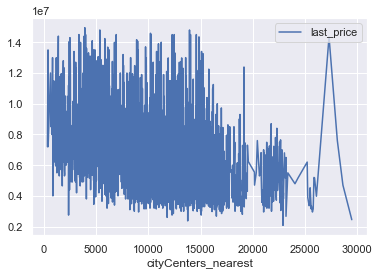

In [97]:
report_cityCenters_spb_center = flats_in_center.groupby('cityCenters_nearest').agg({'last_price':'median'})
report_cityCenters_spb_center.plot()
report_cityCenters_spb = spb_center.groupby('cityCenters_nearest').agg({'last_price':'median'})
report_cityCenters_spb.plot()

Стоимость квартир в центре приблизительно на одном уровне в пределах радиуса = 3 км, но зато после 3 км объявления о продаже встречаются гораздо чаще и стоимость остается на достаточно высоком уровне.

Сравним зависимость цены от дня размещения объявления в квартирах в центре и в целом по городу:

<AxesSubplot:xlabel='first_day_exposition'>

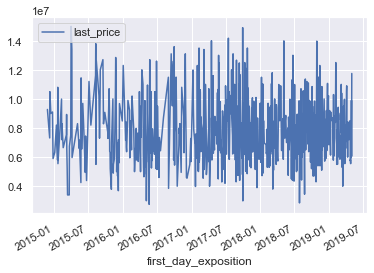

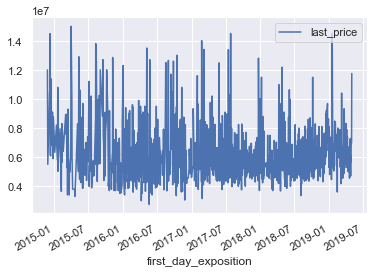

In [98]:
report_first_day_exposition_center = flats_in_center.groupby('first_day_exposition').agg({'last_price':'median'})
report_first_day_exposition_center.plot()
report_first_day_exposition_spb = spb_center.groupby('first_day_exposition').agg({'last_price':'median'})
report_first_day_exposition_spb.plot()

в 2014 объявлений о продаже было совсем мало , как и в целом по городу, так и  в центре. В целом видно всплески (сезонности), с каждым годом график уплотняется и совсем незначительно поднимается.

### Шаг 5. Общий вывод  <a name="step5" />

Данную работу мы начали с предобработки данных таблицы объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области за 2014-2019гг. 
- Более половины столбцов таблицы, содержит пропуски. И если некоторые из них возможно заполнить по логике:'is_apartment', 'balcony', 'days_exposition', что мы и сделали. То в остальных столбцах, где имеются пропуски необходимо проверить логику сбора данных.
- Еще мы перевели форматы некоторых столбцов в более емкие.

Мы избавились от выбросов , чтобы создать описание типичной квартиры в Санкт-Петербурге и области.
Мы устанавили параметры, по которым можно описать типичные объявления. Это может помочь построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
Итак, параметры по Санкт-Петербургу и Ленинградской области:
 - Общая площадь - 31 - 116 кв м 
 - Высота потолков - 2.5 - 3.3
 - Количество комнат - 1-4 
 - Цена - 200 тыс.руб. - 15 млн.руб
 Наиболее очевидными и стабильными факторами на рост цены жилье является
 1. Количество комнат (прямая зависимость: чем больше комнат, тем выше цена)
 2. Зависимость от этажа (Если говорить конкретно о Санкт-Петербурге, квартиры на последнем этаже в Большой цене, зачастую это мансарды с красивым видом на город)
 3. Экономическая ситуация в стране и мире( видно на графике зависимости цены от года)
 4. Удаленность от центра - зависимость достаточно слаба, хоть и имеет место быть. В центре очень большой разброс цен. В отдаленных населенных пунктах так же имеется дорогостоящее жилье, сопоставимое по ценам с жильем в центре Петербурга.
 
 Помимо этого, мы определили топ-10 городов среди Санкт-Петербурга и области. Естественно, на первом месте по подаче объявлений оказался Санкт- Петербург. Тройка лидеров в области: Всеволожск, посёлок Шушары, посёлок Мурино. 
 Изучая десятку лидеров по объявлениям я сделала следующие выводы:
  - Самое дорогое жилье в Санкт-Петербурге, но и бюджетное жилье в городе тоже можно приобрести.
  - Во Всеволожске самые низкие цены на жилье и объявлений в этом населенном пункте достаточно много (на втором месте по количеству объявлений был именно Всеволожск). Кажется, что людям не особо нравится жить в этом городе.
  - Очень дорого стоят квартире в Пушкине и Сестрорецке. Сестрорецк считается морским курортом, Пушкин же просто очень красивый город с хорошей инфрасруктурой и хорошим сообщением до Санкт-Петербурга. Поэтому высокие цены на жилье в этих населенных пунктах оправданы.
 Построив график зависимости цены от расстояния до центра в км., мы определили пики снижения цен на жилье и определили область с точкой осчета от центра и радиусом в 10 км за центр г. Санкт-Петербург.
 Мы выяснили, что:
 - Средняя площадь квартир в центре -65 кв м.
 - При этом слишком низкие (2-3 млн), как и слишком высокие цены (12-15 млн) на квартиры встречаются, но редко. Основной массив объявлений приходится на квартиры стоимостью от 7 до 9 млн. руб.
 - В объявлениях о продаже преобладают двухкомнатные и трехкомнатные квартиры, однокомнатные и четырех-комнатные  встречаются гораздо реже.
 - Очень небольшое количество квартир с потолками ниже 3 м. В основном в квартирах есть "простор".
 Далее мы провели сравнительный анализ квартир в центре и по Санкт-Петербургу в целом по следующим показателям:число комнат, этаж, удалённость от центра, дата размещения объявления. Я пришла к следующим выводам:
  - Количество комнат - является определенно самым объективным признаком повышения цены. Конечно, при условии, если мы сравнимаем квартире в одном и том же населенном пункте.
  - Цена квартир на последнем этаже в целом по городу выше, чем на других этажах. А в центре- примерно на одинаковом уровне. Видимо Петербург славится своими мансардами не только в историческом центре. Тем более,с последних этажей - прекрасный вид на город.
  - Стоимость квартир в центре приблизительно на одном уровне в пределах радиуса = 3 км, но зато после 3 км объявления о продаже встречаются гораздо чаще и стоимость остается на достаточно высоком уровне.
  - в 2014 объявлений о продаже было совсем мало , как и в целом по городу, так и в центре. Так же мы выяснили, что у подачи объявлений о продаже квартир  есть некоторая сезонность и зависимость от экономической ситуации в стране.
  





<div class="alert alert-block alert-warning">
    
<b>Remarks:</b> Общий вывод получился, к сожалению, недостаточно подробным. Подумай об этом так: общий вывод это резюме исследовательской работы и большинстов заказчиков начнут читать работу именно с него. Он должен содержать все обнаруженные инсайды, рекомендации и главное цифры.</div>
✔

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [X]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод